In [ ]:
%pip install pandas numpy matplotlib yfinance pandas-ta

[*********************100%***********************]  1 of 1 completed
<ipython-input-8-0961108b3e77>:53: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"Success Rate: {data['Pattern_Success'].mean() * 100:.2f}%")


Success Rate: 0.00%


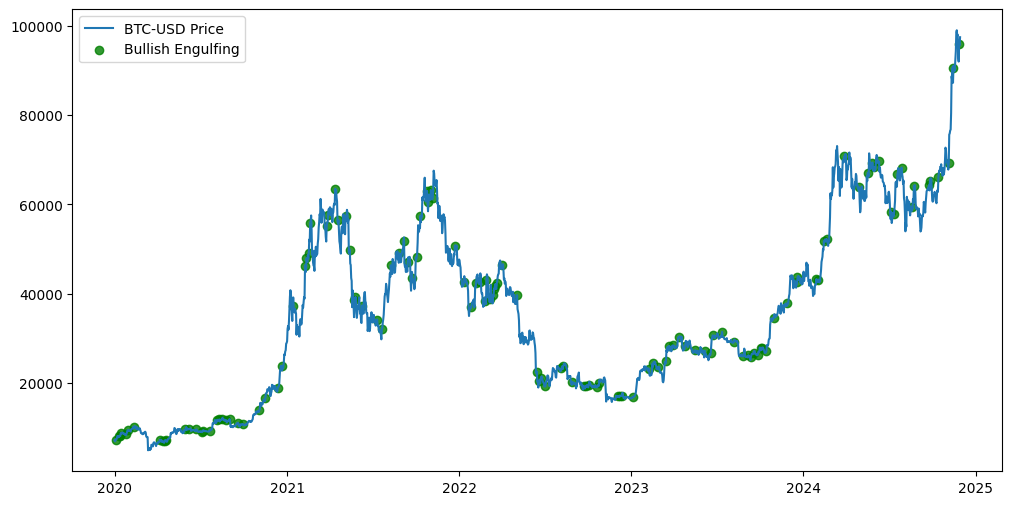

In [8]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

# Fetch BTC/USD historical data
def fetch_data(ticker="BTC-USD", interval="1d", start_date="2020-01-01"):
    data = yf.download(ticker, interval=interval, start=start_date)
    data["Return"] = data["Close"].pct_change()
    return data

# Example pattern: Engulfing (Bullish)
def identify_engulfing(data):
    data["Bullish_Engulfing"] = (
        (data["Open"].shift(1) > data["Close"].shift(1)) &  # Previous candle was bearish
        (data["Open"] < data["Close"]) &  # Current candle is bullish
        (data["Open"] < data["Close"].shift(1)) &  # Current open below previous close
        (data["Close"] > data["Open"].shift(1))  # Current close above previous open
    )
    return data

# Assess success (e.g., price increase within n days)
def evaluate_success(data, lookahead=5, threshold=0.50):
    results = []
    for i in data.index:
        # Use .item() to get the scalar value for comparison
        if data.loc[i, "Bullish_Engulfing"].item():
            future = data.loc[i:i + pd.Timedelta(days=lookahead)]
            success = (future["Close"].max() - data.loc[i, "Close"]) / data.loc[i, "Close"] >= threshold
            results.append(success)
        else:
            results.append(False)
    data["Pattern_Success"] = results
    return data

# Visualization
def visualize(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data["Close"], label="BTC-USD Price")
    plt.scatter(
        data[data["Bullish_Engulfing"]].index,
        data[data["Bullish_Engulfing"]]["Close"],
        color="green", label="Bullish Engulfing", alpha=0.8
    )
    plt.legend()
    plt.show()

# Main Function
if __name__ == "__main__":
    data = fetch_data()
    data = identify_engulfing(data)
    data = evaluate_success(data)
    print(f"Success Rate: {data['Pattern_Success'].mean() * 100:.2f}%")
    visualize(data)